<p style="text-align:center; font-weight:bolder; font-size: 2em">
    L4-Tutorial-Numpy, Pandas and Matplotlib
</p>
<p style="text-align:center; font-family:courier; font-size: 110%">
    <br>11 Feb 2019
    <br>COM5508 Media Data Analytics
    <br>Department of Media and Communication
    <br>City University of Hong Kong
</p>

# Introduction

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. For prediction, “imdb_score” is the dependent variable, and the other 27 variables are predictors (independent variables).
    
    Tasks
    a. Filter all numeric features
        i. Plot the distributions of each numeric feature
        ii. Plot the relationships between numeric features and imdb_scores
    b. Filter all categorical features
        i. Plot the mean of imdb_scores by groups of each categorical features
        ii. Transfer categorical features to dummy variables

# Loading DataFrame from CSV

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings; warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./movie_metadata.csv')
print('# of Rows: ', df.shape[0])

# of Rows:  5043


In [3]:
# Handling Missing Values
df = df.dropna()
print('# of Rows: ', df.shape[0])

# of Rows:  3756


In [4]:
# Removing Duplicates
df = df.drop_duplicates()
print('# of Rows: ', df.shape[0])

# of Rows:  3723


# Dependent Variable

In [5]:
# Discretization and Binning
dv = df["imdb_score"]
bins = [0, 2, 4, 6, 8, 10]; bin_labels = [1, 2, 3, 4, 5]
dv_binned = pd.cut(dv, bins, right = False, labels = bin_labels)
df['imdb_score_binned'] = dv_binned

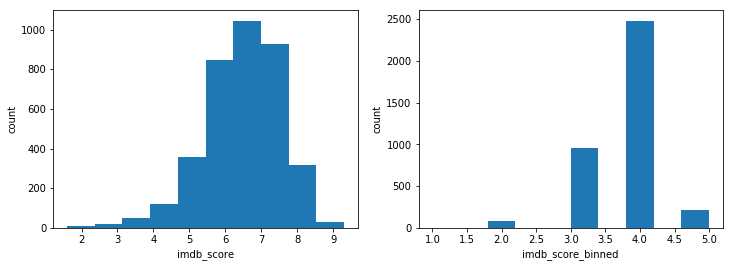

In [6]:
# Setting up figure
fig = plt.figure(figsize=(12, 4))

# Draw left figure
ax = fig.add_subplot(1, 2, 1)
ax.hist(df['imdb_score'])
ax.set_xlabel('imdb_score')
ax.set_ylabel('count')

# Draw right figure
ax = fig.add_subplot(1, 2, 2)
ax.hist(df['imdb_score_binned'])
ax.set_xlabel('imdb_score_binned')
ax.set_ylabel('count')

# Show
plt.show()

# Independent Variables (Numeric)

In [7]:
# Extract numeric features
feature_list = list(set(df._get_numeric_data().columns)\
    - set(['imdb_score', 'title_year', 'aspect_ratio', 'facenumber_in_poster']))
print(feature_list)

['budget', 'actor_1_facebook_likes', 'gross', 'director_facebook_likes', 'num_user_for_reviews', 'duration', 'actor_3_facebook_likes', 'num_critic_for_reviews', 'actor_2_facebook_likes', 'cast_total_facebook_likes', 'num_voted_users', 'movie_facebook_likes']


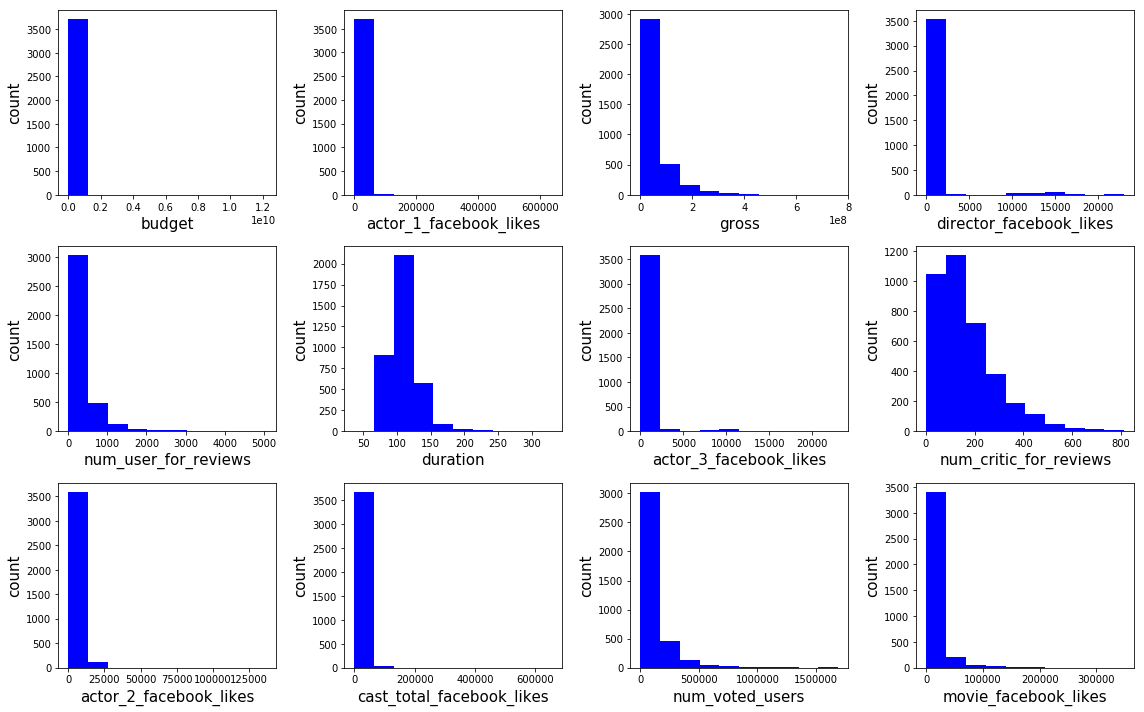

In [8]:
# Setting up figure
fig = plt.figure(figsize=(16, 10))
# There are 12 features in total
for i in range(len(feature_list)):
    ax = fig.add_subplot(3, 4, i+1)
    ax.hist(df[feature_list[i]].values, color='b')
    ax.set_xlabel(feature_list[i], fontsize=15)
    ax.set_ylabel('count', fontsize=15)
# Show with tight layout
plt.tight_layout()
plt.show()

In [9]:
# transfer to log scale
for i in feature_list:
    df[i + '_log'] = np.log(df[i] + 1)

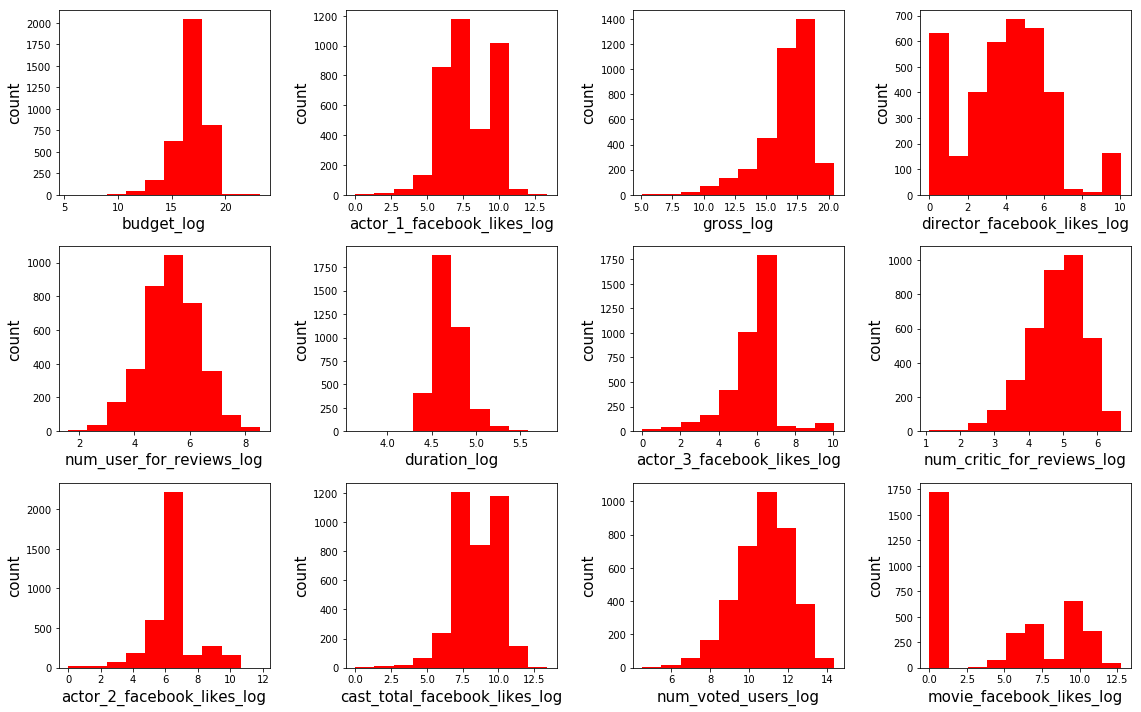

In [10]:
fig = plt.figure(figsize=(16, 10))
for i in range(len(feature_list)):
    ax = fig.add_subplot(3, 4, i+1)
    ax.hist(df[feature_list[i]+'_log'].values, color='r')
    ax.set_xlabel(feature_list[i]+'_log', fontsize=15)
    ax.set_ylabel('count', fontsize=15)
plt.tight_layout()
plt.show()

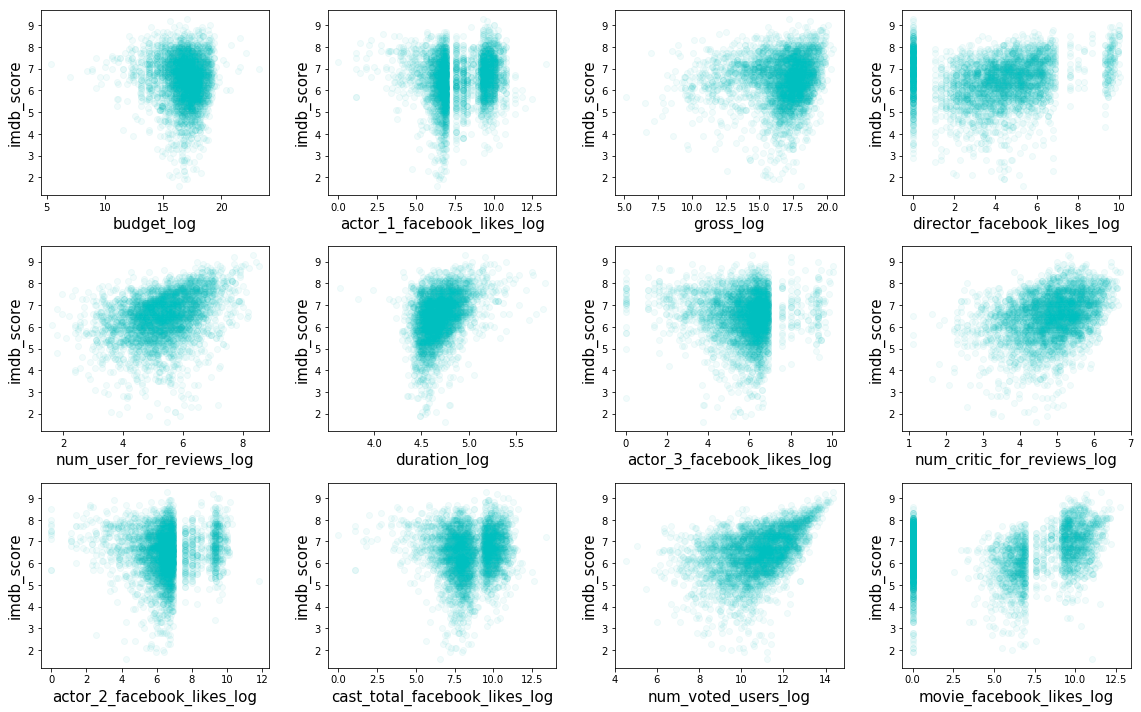

In [11]:
fig = plt.figure(figsize=(16, 10))
for i in range(len(feature_list)):
    ax = fig.add_subplot(3, 4, i+1)
    ax.scatter(df[feature_list[i]+'_log'], df['imdb_score'], color='c', alpha=0.05)
    ax.set_xlabel(feature_list[i]+'_log', fontsize=15)
    ax.set_ylabel('imdb_score', fontsize=15)
plt.tight_layout()
plt.show()

# Independent Variables (Categorical)

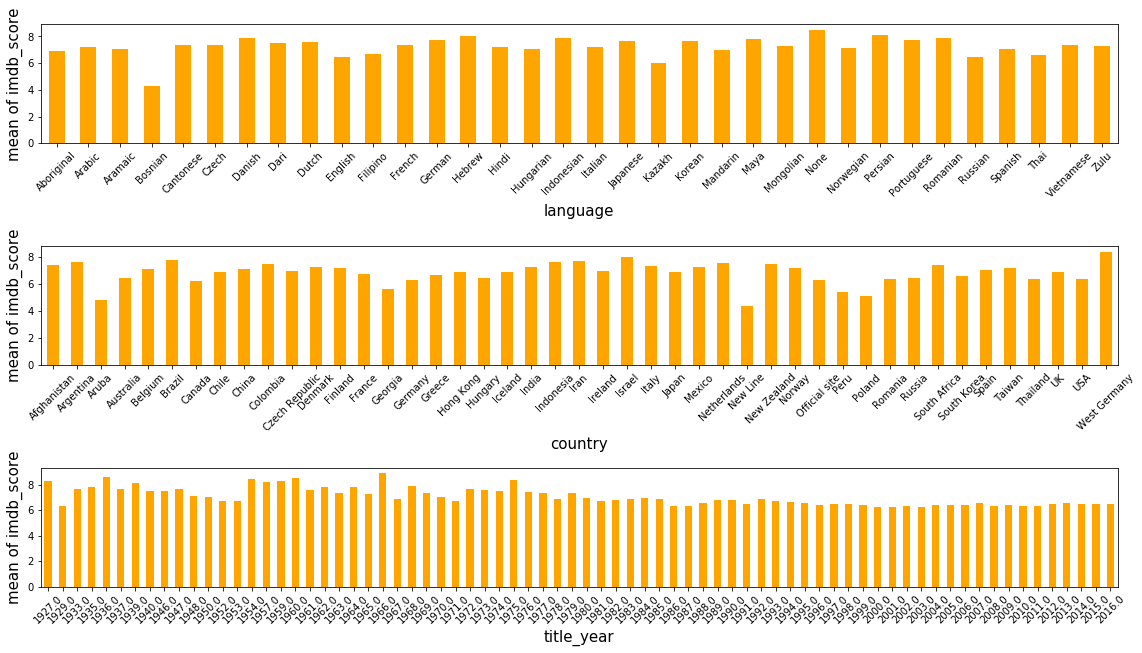

In [12]:
categorical_features = ['language', 'country', 'title_year']

fig = plt.figure(figsize=(16, 9))
for i in np.arange(len(categorical_features)):
    ax = fig.add_subplot(3, 1, i+1)
    s = df.groupby(categorical_features[i]).mean().unstack()['imdb_score']
    s.plot.bar(color='orange', ax=ax)
    ax.set_xticklabels(s.index, fontsize=10, rotation=45)
    ax.set_xlabel(categorical_features[i], fontsize=15)
    ax.set_ylabel('mean of imdb_score', fontsize=15)
plt.tight_layout()
plt.show()

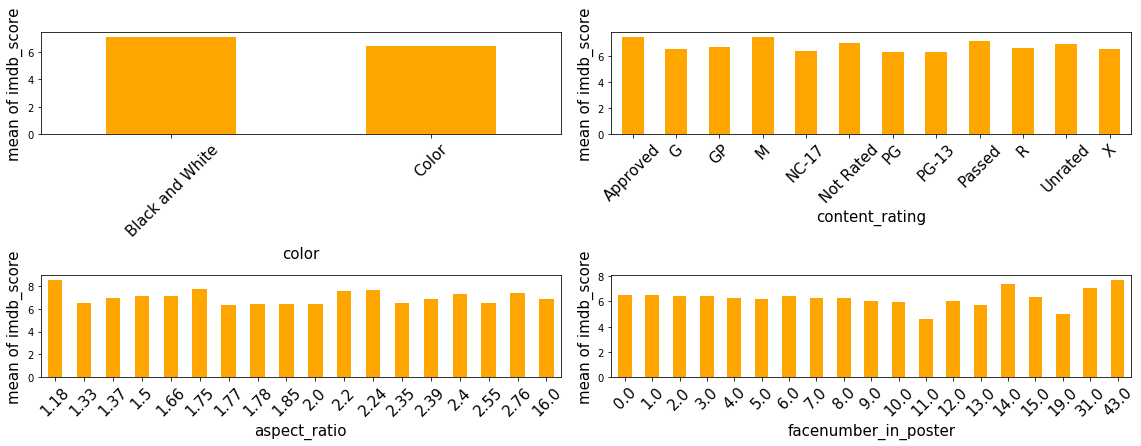

In [13]:
categorical_features = ['color', 'content_rating', 'aspect_ratio', 'facenumber_in_poster']

fig = plt.figure(figsize=(16, 6))
for i in np.arange(len(categorical_features)):
    ax = fig.add_subplot(2, 2, i+1)
    s = df.groupby(categorical_features[i]).mean().unstack()['imdb_score']
    s.plot.bar(color='orange', ax=ax)
    ax.set_xticklabels(s.index, fontsize=15, rotation=45)
    ax.set_xlabel(categorical_features[i], fontsize=15)
    ax.set_ylabel('mean of imdb_score', fontsize=15)
plt.tight_layout()
plt.show()

In [14]:
df_with_dummies = df
for feature in categorical_features:
    aspect_ratio_dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=True)
    df_with_dummies = pd.concat([df_with_dummies, aspect_ratio_dummies], axis=1)
    
print(len(df_with_dummies.columns))

88


In [15]:
df[['plot_keywords', 'genres']].head()

,plot_keywords,genres
0,avatar|future|marine|native|paraplegic,Action|Adventure|Fantasy|Sci-Fi
1,goddess|marriage ceremony|marriage proposal|pi...,Action|Adventure|Fantasy
2,bomb|espionage|sequel|spy|terrorist,Action|Adventure|Thriller
3,deception|imprisonment|lawlessness|police offi...,Action|Thriller
5,alien|american civil war|male nipple|mars|prin...,Action|Adventure|Sci-Fi


In [16]:
genre_list = list(set('|'.join(df['genres'].values).split('|')))

# replace bool values to 1/0 by column
for genre in genre_list:
    df_with_dummies['genre_'+genre] = df['genres'].str.contains('Family').apply(lambda x:1 if x else 0)
    
print(len(df_with_dummies.columns))

110


In [17]:
for i in ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']:
    print('# of', i, ":", len(df[i].drop_duplicates()))

# of director_name : 1659
# of actor_1_name : 1428
# of actor_2_name : 2188
# of actor_3_name : 2587
